# Ford GoBike System Data Exploration 



## by Abdullah Majed



## Dataset Overview

includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, it consist of 183412 row, the features include duration, user type, gender, date of birth..etc, unfourtnetly the website of orginal data is shutdown when i did this analysis you can check other systems data from this [page](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems).

## Who are the users spend most time riding bikes ?

In this investigation, I wanted to identify the user profile who spend most time riding bikes, and when they like to ride.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.mode.chained_assignment = None
plt.style.use('fivethirtyeight')
base_color = sb.color_palette()[0]
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')

In [3]:
# crate weekdays categorie type
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)

# convert day column to orderd category
df['day'] = df['day'].astype(ordered_days)

### How long does the average trip take?


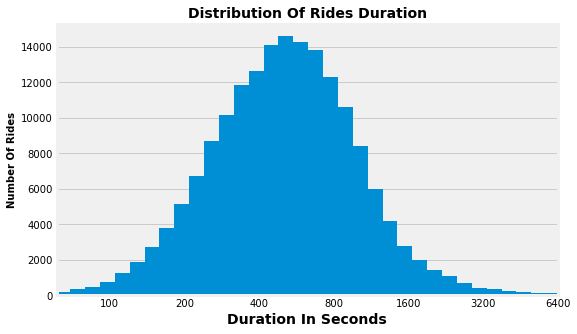

In [16]:
# log scale histogram 
binsize = 0.06
bins = 10 ** np.arange(1.78, 4.92+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([100, 200, 400, 800, 1600, 3200, 6400, 12800], [100, 200, 400, 800, 1600, 3200, 6400, 12800])
plt.title('Distribution of Rides Duration'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Duration in Seconds'.title(),
               fontsize = 14, weight = "bold")
plt.ylabel('Number of Rides'.title(),
               fontsize = 10, weight = "bold")
plt.xlim((61, 6400))
plt.grid(axis = 'x')

Rides duration in the dataset take on a very large range of values, from about  `61 sec` 𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡 `84,548 sec` at the highest. Plotted on a logarithmic scale, the distribution of duration takes on a unimodal shape. the average trip take between between 500 and 650 sec.


### When are most trips taken in terms of day of the week ?

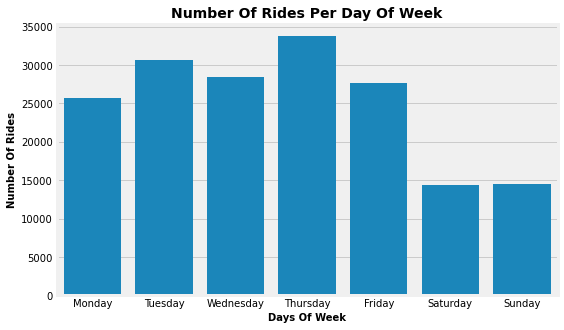

In [9]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='day', color=base_color);
plt.title('Number of Rides per Day of Week'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Days of Week'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Number of Rides'.title(),
               fontsize = 10, weight = "bold");


in general most rides come in week weekday rather than weekend, Thursday has the most rides almost 35000



### When are most trips taken in terms of hour of day ?

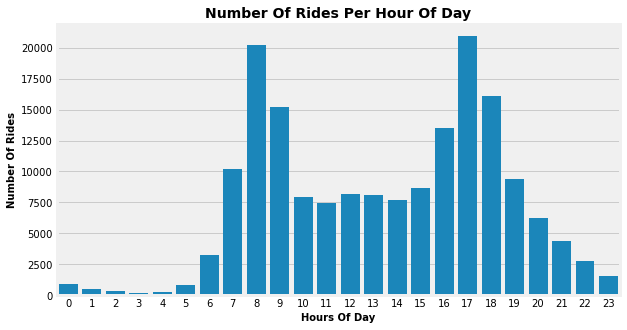

In [15]:
# plot the distripution of start_hour
plt.figure(figsize=[9, 5])
sb.countplot(data=df, x='start_hour', color=base_color);
plt.title('Number of Rides per Hour of Day'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Hours of day'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Number of Rides'.title(),
               fontsize = 10, weight = "bold");


Hour has bimodal distribution, we can see that people love ride bike early in the morinig peak at `8 AM`, then it goes down until sunset it start increases again the second peak at `6 PM`.



### What is the average age of our users ?

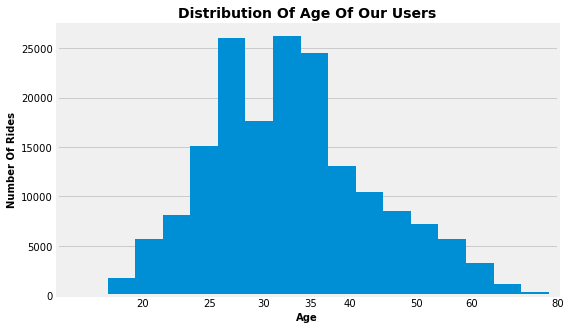

In [13]:
# log scale histogram 
binsize = 0.04
bins = 10 ** np.arange(1.25, 2.14+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.title('Distribution of Age of our Users'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Age'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Number of Rides'.title(),
               fontsize = 10, weight = "bold")
plt.hist(data = df, x = 'age', bins=bins)
plt.xlabel('Age')
plt.xscale('log')
plt.xticks([20, 25, 30,35, 40, 50, 60,80], [20, 25, 30,35, 40, 50, 60,80])
plt.xlim(15, 80)
plt.grid(axis ='x')

Age has a long-tailed distribution, with a lot of rides by young people, and few on by old people. When plotted on a log-scale, the age distribution looks roughly bimodal, most of people between 27 and 35

### What is the most type of the users ?

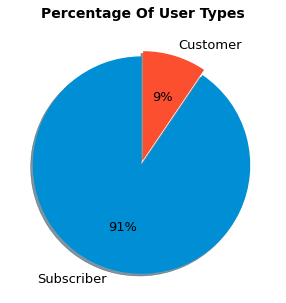

In [17]:
# plot the pie chart
sorted_counts = df.user_type.value_counts()

plt.subplots(figsize=(5,5)) 
explode = (0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.title('Percentage of User types'.title(),
               fontsize = 14, weight = "bold")
plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13});


most of the users are subscribers, only `9%` are customers


### What is the most gender of the users ?

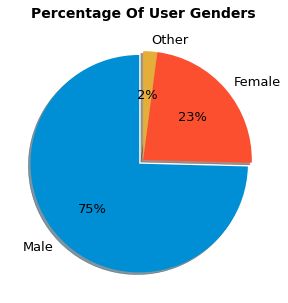

In [18]:
# plot the pie chart
sorted_counts = df.member_gender.value_counts()

plt.subplots(figsize=(5,5)) 
explode = (0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.title('Percentage of User Genders'.title(),
               fontsize = 14, weight = "bold")
plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13});


most of the users are males, only `23%` are females, and `2%` other


### When are most duration average in terms of day of the week ?

In [42]:
# method return mask removing outliers
from scipy import stats
def no_outlires(df):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    z = np.abs(stats.zscore(df))
    no_outlires = (z < 3).all(axis=1)
    return no_outlires

In [43]:
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

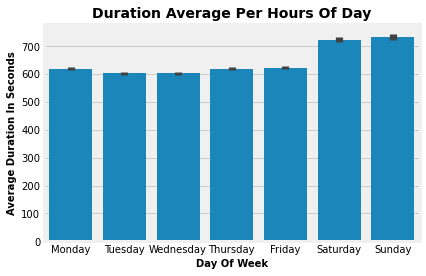

In [44]:
sb.barplot( x=no_outlires_df.day, y=no_outlires_df.duration_sec, color = base_color)
plt.title('Duration average per Hours of Day'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day of Week'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold");

it seems people spend more time riding bikes on weekends


### When are most duration average in terms of hour of day ?

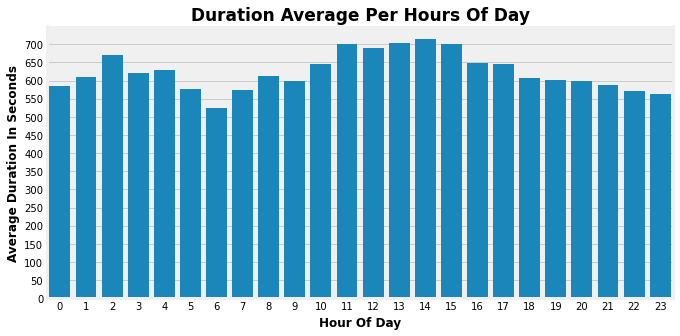

In [45]:
# barchart for average duration vs hours without outliers

duration_mean = no_outlires_df.groupby('start_hour')['duration_sec'].mean()
plt.subplots(figsize=(10, 5)) 
sb.barplot(x=duration_mean.index, y=duration_mean, color= base_color)
plt.title('Duration average per Hours of Day'.title(),
               fontsize = 17, weight = "bold")
    # Add x label and format it
plt.xlabel('Hour of day'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 12, weight = "bold")
plt.yticks(np.arange(0, 701, 50));

The trend change a lot, now we can see on average people spend more time riding the bike when they start between `11 AM` and `4 PM`, and the lowest duration average when they start around `6 AM`

### What is the relation between age and bike riding time ?

In [33]:
# remove outliers from duration and age

no_outlires_df = df[no_outlires(df[['duration_sec', 'age']])]
no_outlires_df.shape[0] / df.shape[0]

0.9861619186977

In [34]:
bin_edges = np.arange(no_outlires_df.age.min(), no_outlires_df.age.max() + 3, 3)
bin_centers = bin_edges[:-1] 

# Cut the bin values into discrete intervals. Returns a Series object.
age_binned = pd.cut(no_outlires_df.age, bin_edges, include_lowest = True)
duration_mean = no_outlires_df.duration_sec.groupby(age_binned).mean()

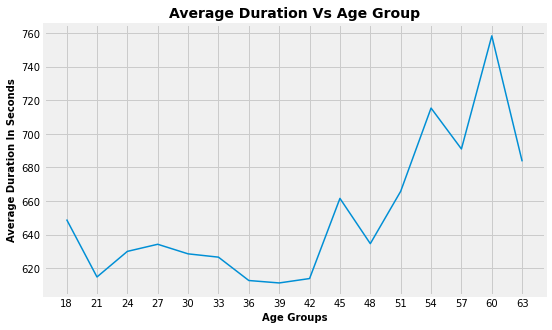

In [35]:
# line plot for age vs duration without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    plt.errorbar( x = bin_centers, y=duration_mean)
    plt.title('Average Duration vs Age Group'.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel('Age Groups'.title(),
               fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold")
    plt.xticks(np.arange(18, bin_centers.max()+ 1, 3));

it looks like people between 45 and 63 age spend more time riding bikes.


### What user type spend more time riding bikes ?

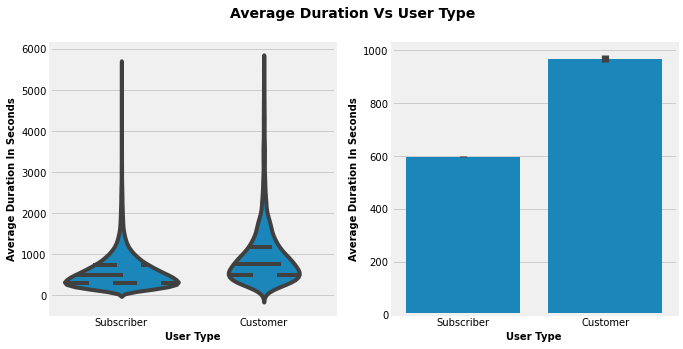

In [39]:
plt.figure(figsize = [10, 5])
plt.suptitle('Average Duration vs User type'.title(),
               fontsize = 14, weight = "bold")
# left plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot( x=no_outlires_df.user_type, y=no_outlires_df.duration_sec, inner="quartile",
                  color = base_color)
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold")

# right plot: adapted bar chart
plt.subplot(1, 2, 2)
sb.barplot( x=no_outlires_df.user_type, y=no_outlires_df.duration_sec, color = base_color);
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold");


On average Customers spend `250 sec` more than subscribers.


### what gender spend more time riding bikes?

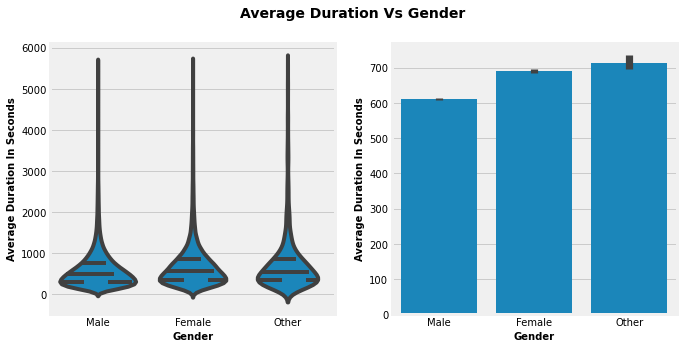

In [41]:
plt.figure(figsize = [10, 5])
plt.suptitle('Average Duration vs Gender'.title(),
               fontsize = 14, weight = "bold")
# left plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot( x=no_outlires_df.member_gender, y=no_outlires_df.duration_sec, inner="quartile",
                  color = base_color)
# Add x label and format it
plt.xlabel('Gender'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold")

# right plot: adapted bar chart
plt.subplot(1, 2, 2)
sb.barplot( x=no_outlires_df.member_gender, y=no_outlires_df.duration_sec, color = base_color);
# Add x label and format it
plt.xlabel('Gender'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold");


Others gender spend most time riding bike with average excede `700 sec`, females come next with average slightly below `700 sec`, lastly males is the lowest with average close to `600 sec`


### What day each user type perfer ?

In [47]:
# this method will help us compute the ratio column
def compute_ratio(row, column_name, list_of_sum):
    
    return row['count'] / list_of_sum[row[column_name]]

In [48]:
count_user_type_day = df.groupby(['day', 'user_type']).size().reset_index(name="count")
# get the list of sum for each user type
user_type_sum = count_user_type_day.groupby('user_type')['count'].sum()
# compute each ratio
count_user_type_day['ratio'] = count_user_type_day.apply(lambda row: compute_ratio(row, 'user_type', user_type_sum), axis=1)

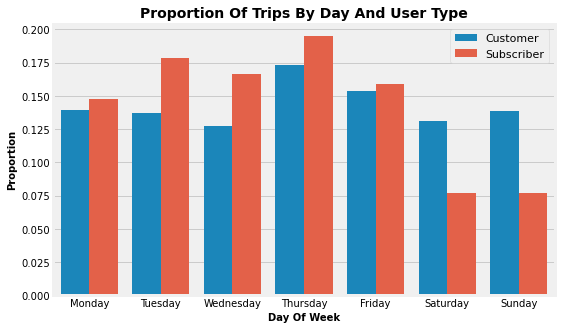

In [50]:
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = count_user_type_day, x = 'day', y='ratio', hue = 'user_type');
plt.title('Proportion of Trips By Day and User Type'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Day of Week'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Proportion'.title(),
               fontsize = 10, weight = "bold")
plt.legend(fontsize = 11);

This barchart dose not show counts, instead it shows ratio of user_type count of each day to the sum of all days.

now we can see that Subscriber perfer to ride on weekdays more than Customers, but Customers perfer to ride on weekends more

### How average duration by age group differ in each user type ?

In [51]:
# remove outliers from duration and age

no_outlires_df = df[no_outlires(df[['duration_sec', 'age']])]
no_outlires_df.shape[0] / df.shape[0]

0.9861619186977

In [52]:
bin_edges = np.arange(no_outlires_df.age.min(), no_outlires_df.age.max() + 3, 3)

# Cut the bin values into discrete intervals. Returns a Series object.
age_binned = pd.cut(no_outlires_df.age, bin_edges, include_lowest = True)
duration_mean_user = no_outlires_df.groupby(['user_type', age_binned])['duration_sec'].mean().reset_index(name="duration")
bin_centers = bin_edges[:-1] 
duration_mean_user['age_centers'] = np.tile(bin_edges[:-1], 2)


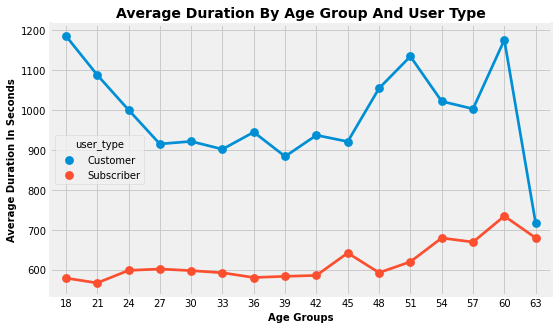

In [53]:
# line plot for age vs duration vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    sb.pointplot(data=duration_mean_user, x = 'age_centers', y='duration', hue='user_type');
    plt.grid(axis='x')
    plt.title('Average Duration By Age Group and User Type'.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel('Age Groups'.title(),
               fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold")

Notice that Customers from 48 to 60 has the highest durtion average.

### How average duration by hour differ in each user type ?

In [26]:
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

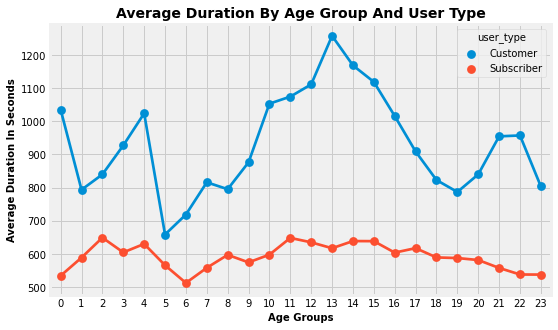

In [54]:
# line plot for average duration vs hours vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    duration_hours_user = no_outlires_df.groupby(['user_type','start_hour'])['duration_sec'].mean().reset_index(name="duration")
    sb.pointplot(data=duration_hours_user, x='start_hour', y='duration', hue='user_type')
    plt.grid(axis='x');
    plt.title('Average Duration By Age Group and User Type'.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel('Age Groups'.title(),
               fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold")

Customers really love riding more between `10 AM` and `4 PM` with duration average between `1000 sec` and `1300 sec`


### How average duration by hour differ in each gender ?

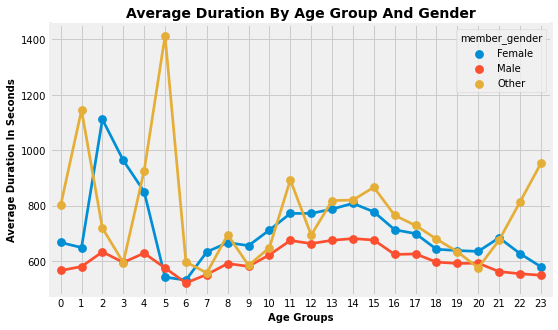

In [55]:
# line plot for average duration vs hours vs member_gender without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    duration_hours_gender = no_outlires_df.groupby(['member_gender','start_hour'])['duration_sec'].mean().reset_index(name="duration")
    sb.pointplot(data=duration_hours_gender, x='start_hour', y='duration', hue='member_gender')
    plt.grid(axis='x');
    plt.title('Average Duration By Age Group and Gender'.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel('Age Groups'.title(),
               fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Average Duration in Seconds'.title(),
               fontsize = 10, weight = "bold")

unlike males females and others love to ride more between `0 AM` and `5 AM`, but they all ride less at `6 AM` i guess this is because it is before work, then the ride duration increases for all genders and it start decrease again at `4 PM`



### what about average age by gender in hours of the day ?

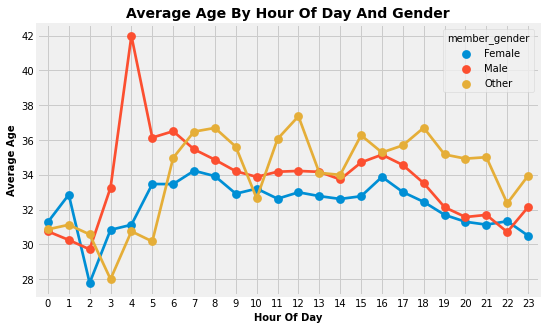

In [56]:
# line plot for average age vs hours vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    age_hours_user = no_outlires_df.groupby(['member_gender','start_hour'])['age'].mean().reset_index(name="age")
    sb.pointplot(data=age_hours_user, x='start_hour', y='age', hue='member_gender')
    plt.grid(axis='x');
    plt.title('Average Age By Hour of day and Gender'.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel('Hour of Day'.title(),
               fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel('Average Age'.title(),
               fontsize = 10, weight = "bold")

In the plot we had earlire in bivariate exploratory `duration vs age` showed that the oldest age average we got at `4 AM`, but here we see that only male males had oldest age average at `4 AM`, this happened because male are `75%` of the data.

### What user type and gender combination has the most duration average ?

In [30]:
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

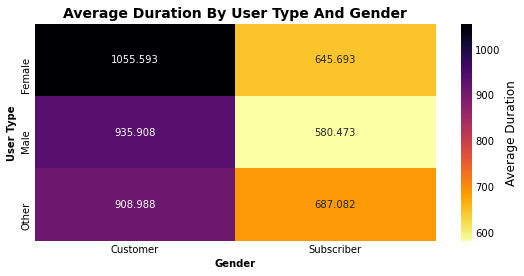

In [58]:
plt.figure(figsize=[8,4])
duration_means = no_outlires_df.groupby(['user_type', 'member_gender'])['duration_sec'].mean()
duration_means = duration_means.reset_index(name = 'duration_sec')
duration_means = duration_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_sec')
sb.heatmap(duration_means, annot = True, fmt = '.3f', cmap='inferno_r',
           cbar_kws = {'label' : 'Average Duration'});
plt.title('Average Duration By User Type and Gender'.title(),
               fontsize = 14, weight = "bold")

plt.xlabel('Gender'.title(),
               fontsize = 10, weight = "bold")

plt.ylabel('User Type'.title(),
               fontsize = 10, weight = "bold");

Female Customers have the highest duration average with `1057 sec`, male subscribers have the lowest with `581 sec`